In [3]:
import random
import time
import matplotlib.pyplot as plt

In [4]:
def stop_and_wait_arq(total_frames=5, loss_prob=0.3, timeout=2):
    current_frame = 0

    while current_frame < total_frames:
        print(f"Sending Frame {current_frame}")
        time.sleep(0.5)

        # Simulate random frame loss
        frame_lost = random.random() < loss_prob

        if not frame_lost:
            # ACK received successfully
            print(f"ACK {current_frame} received\n")
            current_frame += 1
            continue
        else:
            print(f"Frame {current_frame} lost")

        # Timeout and retransmission
        start_time = time.time()
        ack_received = False

        while not ack_received:
            if time.time() - start_time > timeout:
                print(f"Timeout! Retransmitting Frame {current_frame}")
                time.sleep(0.5)
                frame_lost = random.random() < loss_prob
                if not frame_lost:
                    print(f"ACK {current_frame} received\n")
                    current_frame += 1
                    ack_received = True
                else:
                    print(f"Frame {current_frame} lost again")
                    start_time = time.time()

    print("All frames transmitted and acknowledged successfully")

stop_and_wait_arq(total_frames=6, loss_prob=0.3, timeout=2)

Sending Frame 0
Frame 0 lost
Timeout! Retransmitting Frame 0
ACK 0 received

Sending Frame 1
Frame 1 lost
Timeout! Retransmitting Frame 1
ACK 1 received

Sending Frame 2
ACK 2 received

Sending Frame 3
ACK 3 received

Sending Frame 4
Frame 4 lost
Timeout! Retransmitting Frame 4
Frame 4 lost again
Timeout! Retransmitting Frame 4
ACK 4 received

Sending Frame 5
ACK 5 received

All frames transmitted and acknowledged successfully


In [5]:
def go_back_n_arq(total_frames=10, window_size=4, loss_prob=0.2):
    base = 0
    while base < total_frames:
        end = min(base + window_size, total_frames)
        print(f"Sending frames {list(range(base, end))}")

        # Simulate random frame loss
        lost_frame = None
        for i in range(base, end):
            if random.random() < loss_prob:
                lost_frame = i
                print(f"Frame {i} lost!")
                break

        if lost_frame is not None:
            print(f"Retransmitting frames {list(range(lost_frame, end))}")
            time.sleep(1)
        else:
            base = end
            print(f"ACK {base - 1} received, window slides to {base}\n")
            time.sleep(0.5)

go_back_n_arq()

Sending frames [0, 1, 2, 3]
ACK 3 received, window slides to 4

Sending frames [4, 5, 6, 7]
ACK 7 received, window slides to 8

Sending frames [8, 9]
ACK 9 received, window slides to 10



Packet loss at round 3, cwnd=4 → multiplicative decrease
Packet loss at round 10, cwnd=7 → multiplicative decrease
Packet loss at round 17, cwnd=8 → multiplicative decrease
Packet loss at round 18, cwnd=1 → multiplicative decrease
Packet loss at round 19, cwnd=1 → multiplicative decrease


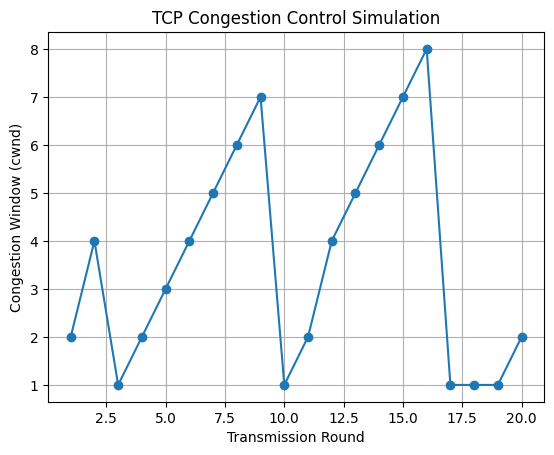

In [6]:
def tcp_congestion_control(rounds=20, loss_prob=0.2):
    cwnd = 1
    ssthresh = 8
    cwnd_values = []

    for r in range(rounds):
        if random.random() < loss_prob:
            print(f"Packet loss at round {r+1}, cwnd={cwnd} → multiplicative decrease")
            ssthresh = max(cwnd // 2, 1)
            cwnd = 1
        else:
            if cwnd < ssthresh:
                cwnd *= 2  # Slow Start
            else:
                cwnd += 1  # Congestion Avoidance
        cwnd_values.append(cwnd)

    # Plot cwnd growth
    plt.plot(range(1, rounds + 1), cwnd_values, marker='o')
    plt.title("TCP Congestion Control Simulation")
    plt.xlabel("Transmission Round")
    plt.ylabel("Congestion Window (cwnd)")
    plt.grid(True)
    plt.show()

tcp_congestion_control()